# $\color{purple}{\text{FOMC Statements (2007-2022): Reading Between the Lines}}$

**Alexander Ng & Philip Tanofsky**

__Data 620 - Web Analytics__

**May 22, 2022**


<img src = "../raw/FOMC_Meeting.jpg" width="1200" />

## $\color{blue}{\text{Executive Summary}}$



The Federal Open Market Committee (FOMC) produces policy statements that are closely analyzed by financial markets, politicians and business leaders.
We analyze a corpus of 126 FOMC statements from Jan 2007-May 2022 using natural language processing methods and compare them to financial market variables, economic indicators and known policy initiatives of the Federal Reserve.

Using Latent Dirichlet Allocation (LDA), we find a strong linkage between topics and the four programs of quantitative easing (QE) that the FOMC undertook to support the economy and financial markets from 2009-2022.  Although the high frequency words of each topic are unhelpful in identifying the QE regimes, by comparing the time periods when each topic has high weight within the corpus, we are able to demonstrate close alignment between the announcement date of each QE program and the inception of a new topic.

Using a financial sentiment dictionary, we find time variation of sentiment within the FOMC statement corpus that is consistent with real-world events. 

$\color{red}{\text{Add your text here - Phil}}$




## $\color{blue}{\text{1 - Introduction}}$



The Federal Open Market Committee (FOMC) is the key decision making body at the US Federal Reserve.  It sets the target Federal Funds interest rate, sets monetary policy to meet its dual mandate on managing inflation to a moderate and stable target of 2 percent and maximum employment consistent with the inflation target.  The FOMC statement is released every 6-8 weeks and announces the new target interest rate, views of current and future economic conditions and provides an outlook for future rates and asset purchases.  FOMC statements affect financial markets and business investment decisions.

A great deal of academic research has investigated the FOMC statements, minutes, transcripts.   Machine learning and time series studies have been applied to FOMC corpora as well.  Sentiment analysis and study of FOMC communications impact on markets and economics have been extensive.  The related work cited below is just a sample.
[Rosa (2013)](#Rossa2013) finds that FOMC statements move asset prices by increasing volatility of 10 year Treasury yields, SP500 Index returns, Euro-USD, Swiss Franc-USD, Japanese Yen-USD FX rates within 5 minutes of the statements release.    [Lucca and Trebbi (2009)](#LuccaTrebbi2009)    find that the hawkish or dovish tone of the FOMC statements can influence longer maturity Treasury rates.
[Gu, Kurov, Wolfe (2018)](#GuKurovWolf2018) find a 49 basis point increase in U.S. stock prices within the first hour after recent FOMC announcements.   [Cieslak, Morse, Vissing-Jorgensen (2019)](#CieslakMorseVissingJorgensen2019) shows much of the U.S. equity premium since 1994 has been earned on even numbered weeks tied to the FOMC meeting cycle.   They propose a causal explanation in terms of informal communications from the Fed.   Sentiment analysis using the positive and negative tone of the FOMC minutes using the financially oriented Loughran-McDonald dictionary has been demonstrated by [Cannon (2015)](#Cannon2015) to have significant correlation to real economic indicators.   Cannon showed a 26% positive correlation between the sentiment of Fed members to the Chicago Fed National Activity Index (CFNAI).


[Gutierrez, et. al. 2020](#Gutierrez2020) apply LDA analysis to FOMC statements to compare topics between the 2008 Financial Crisis and the 2020 Covid-19 pandemic.  They find similarities in concern in the topics associated with each crisis period.  Moreover, our technical approach using `Python`, `gensim` and `pyLDAvis` closely follows the approach of [Gutierrez, et. al. 2020](#Gutierrez2020).  However, we disagree on two key conclusions:  (a) that the Covid-19 pandemic was a more severe crisis than the 2008 Financial Crisis and (b) the absence of a clear topic interpretation.   
[Lagana, 2020](#Lagana2020) applies LDA analysis to both FOMC statements and FOMC minutes to identify variation in topics as a result of a change of policy in forward guidance by the Federal Reserve.   Her work finds no evidence of change in topic weight related to transparency in the statements.   [Jegadeesh and Wu (2015)](#JegadeeshWu2017) applied LDA to FOMC minutes and statements.  They find minutes are informative and they conduct a detailed event study between minutes releases and intraday asset returns.  They find a relationship between topic content and market volatility.  However, they argue that topic modeling is inappropriate for FOMC statements because of their brevity.   We disagree with the latter point as we find evidence that topics linked to Quantitative Easing programs.


In [section 2](#section2), we explore the FOMC statement characteristics and the time series of relevant macroeconomic and financial variables.  Then, we produce a Latent Dirichlet Allocation topic model of the corpus showing the topic identification to Quantitative Easing programs in [Section 3](#section3).   In [Section 4](#section4), we extract the FOMC statement sentiment and consider long term regressions of sentiment against financial and economic variables.  [Section 5](#section5) summarizes our findings and Section 7 contains detailed tables of LDA topic weights, sentiment data.



## $\color{blue}{\text{2 - Exploratory Data Analysis}}$  <a id='section2'></a> 

This section explores the some trends of the FOMC statements and their related macroeconomic and financial timeseries from the 2007-2022 period.
We consider some aspects over this lengthy period:

*   the linguistic patterns of FOMC statements in different regimes
*   the federal funds target rate over this period.  This rate is set within each FOMC statement and is viewed as an `output` of the FOMC process.
*   the macroeconomic variables including economic growth, inflation and labor market conditions.  These indicators are key `inputs` to the FOMC process.
*   financial market variables are both `inputs` and responses to the FOMC process.

### Linguistic Patterns

As the chairperson and the members of the FOMC committee write and/or approve the text language, we expect textual variations due to the chairperson.
The below table and chart shows the FOMC policy statement length (in words) by chairperson and time.

*  Ben Bernanke was the Federal Reserve chairman from 2006 - 2014.  (https://www.federalreservehistory.org/people/ben-s-bernanke)
*  Janet Yellen was the Federal Reserve chairwoman from 2014 - 2018.  (https://www.federalreservehistory.org/people/janet-l-yellen)
*  Jerome Powell is the current Federal Reserve chairman from 2018 - present.  (https://www.federalreservehistory.org/people/jerome-h-powell)

Stylistically, we see that the length of statements during Bernanke's chairmanship increased in length from 2007-2014 due to a desire to provide greater transparency to financial markets and decision makers.  Overall, his statements averaged 442 words each but increased from 200 to nearly 900 at their peak.

Janet Yellen's statements grew in length and reading complexity.  Her statements averaged 602 word but declined over time.  According to [Hernandez & Shell](https://research.stlouisfed.org/publications/economic-synopses/2014/11/05/the-rising-complexity-of-the-fomc-statement/), the reading complexity of Yellen's statements reached grade level 18 and 19 using the Flesch-Kincaid index.  This implied Yellen's statements required 3-4 years of post-graduate education to be understood.

Powell's statements declined in length and reading complexity with an average statement length of 407 words during his tenure.


In [97]:
%matplotlib inline

In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import logging
logging.disable()

In [99]:
import io
import os.path
import math
#import requests
#from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim import models
import matplotlib.pyplot as plt
#import spacy
from pprint import pprint
from wordcloud import WordCloud
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import smart_open

# Prepare corpus
derived_data_dir = "../derived"

fomc_statements_file = derived_data_dir + "/" + "FOMC_statements.csv"

df_fomc_statements_raw = pd.read_csv( fomc_statements_file )

docs = df_fomc_statements_raw.text

Text(0.5,1,'FOMC Statement Length by Chairperson')

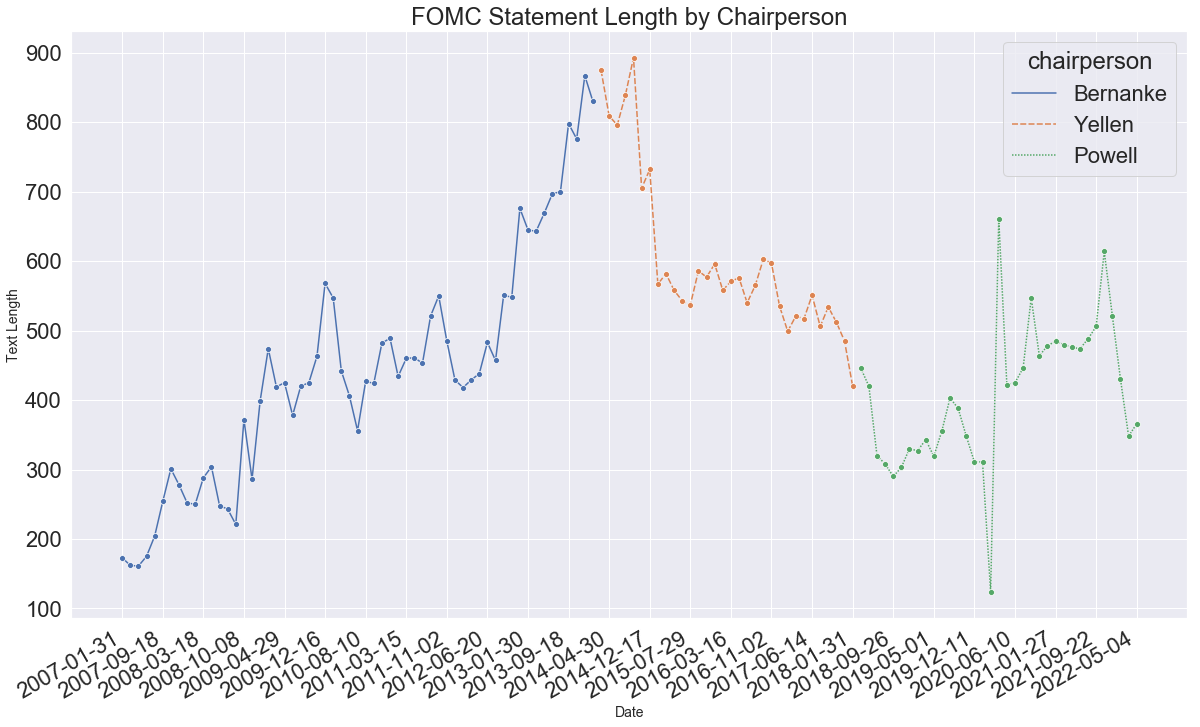

In [103]:
freq = 5
fig, ax = plt.subplots()
sns.set( rc = { 'figure.figsize' : ( 20, 12 ) } )
sns.set( font_scale = 2 )
p = sns.lineplot( x = 'date', y = 'length', hue = 'chairperson' , 
             style  = 'chairperson' ,
             marker = 'o', data = df_fomc_statements_raw, ax = ax )

p.set_xlabel( "Date", fontsize = 14 )
p.set_ylabel( "Text Length", fontsize = 14 )

ax.set_xticklabels( df_fomc_statements_raw.iloc[::freq].date )
xtix = ax.get_xticks()
ax.set_xticks( xtix[::freq ] )
fig.autofmt_xdate()

plt.title("FOMC Statement Length by Chairperson" )

In [104]:
#
# Display average FOMC statement length by Chairperson
heading_properties = [('font-size', '18px')]
cell_properties = [('font-size', '16px')]
dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]
a = df_fomc_statements_raw.groupby('chairperson')[["length", "year"]].mean()

a.sort_values(by=["year"] )[["length"]].style.set_table_styles(dfstyle)


,length
chairperson,
Bernanke,442.949153
Yellen,602.656250
Powell,407.942857


###  Federal Funds Target Rates

During the study period, we see that the FOMC target for the federal funds rate varied significantly.
Moreover, during the 2008 financial crisis, the FOMC changed its practice from setting a single rate to setting a target range with a lower and upper bound on the range.
The key features of the rate setting over this period are:

*  Rate reduced from 5-1/4 percent in 2007 to 0-1/4 percent target rate in 2009 as the 2008 Financial Crisis worsened.
*  Lengthy period of near zero target rate from 2009 - 2016 as the FOMC tried to resuscitate a weak labor market and weak inflation.
*  Steady rate increases from 2016-2020 as economic conditions and labor markets improved.
*  Rate cuts from 2020-Jan 2022 to battle the economic effects of the Covid-19 pandemic.
*  Rate increases from March 2022 to battle inflation.


<img src="../fred/FEDFUNDS_HISTORY.png" width="1200" />

###  Macroeconomic Conditions

We examine the unemployment rate (U-3) `UNRATE` and the Labor Participation Rate `CIVRATE`, defined as the percentage of
of people in the labor force as a percentage of the civilian noninstitutional population.
Both statistics are reported monthly by the Bureau of Labor Statistics.  The chart below shows their time series.

*  `CIVRATE` shows a steady decline from 66-62% from 2007-2015 before regaining some ground in 2016-2020.  The arrival of Covid-19 caused a massive decline in labor force participation to 60% in 2020.  This phenomenon has been called the `Great Resignation`.

*  `UNRATE` shows the traditional measure of unemployment.  It increased significantly during the 2008 financial crisis and remained high even after financial markets recoved in 2010.   However, the short term spike in unemployment during the Covid-19 pandemic showed that enormous economic cost of lockdowns and disruptions to businesses.



<img src="../fred/UNRATE_CIVPART_HISTORY.png" width="1200" />

Concurrently, we see that real GDP growth below.  Expressed in percentage form as the quarterly change in real GDP over a 12-month period, `GDPC1` shows a significant drop during both the 2008 Financial Crisis and the 2020 Covid-19 induced recession.   The rebound in GDP is sharper for the 2020 recession because its cause is physical rather than financial.

<img src="../fred/GDPC1_HISTORY.png" width="1200" />

### Financial Market Variables



We plot 4 financial time series from the FRED database which represent interest rates, credit, inflation and equity markets.

*  **BAA10Y**, Moody's Seasoned Baa Corporate Bond yield relative to yield on 10-year Treasury Constant Maturities.  

*  **T10YIE**, the breakeven inflation rate represents the expected inflation derived from 10-Year Treasury constant maturity securities minus the 10-Year Treasury Inflation-Indexed Constant Maturity index.  It represents market expectations of average inflation over the next 10 years.

*  **WILL5000IND**, the total returns of the Wilshire 5000 Stock Index, observed daily, including reinvested dividends.  This is a broad measure of the entire US stock market.

*  **DGS10**, the yield on 10-year Treasury Constant Maturities.

Later, we will regress returns on these variables on the sentiment indicators of the FOMC statements.

The panel of time series plots show `BAA10Y`, `DGS10`, `T10YIE`, `WILL5000IND` aross columns and then rows.

We make observations grouped by period on each time series.

*  During the **2007-2009 Financial Crisis**:
    +   `BAA10Y`, the `Baa` Corporate Yield Spread, spiked before falling back to normal levels.
    +   `DGS10`, US Treasury 10-year yields, declined as investors bid up Treasuries in a flight-to-quality.
    +   `T10YIE`, US Treasury 10-year TIPS breakeven inflation, dipped to nearly zero, as investors worried about a long term financial meltdown.
    +   `WILL5000IND` fell sharply in late 2008 to early 2009 before rallying by end of 2009.

*  During the **2020 Covid-pandemic**:
    +   `BAA10Y` credit spreads spiked again but less sharply because the pandemic was viewed as a real-world crisis not a dysfunction in the financial markets.
    +   `DGS10`, US Treasury 10-year yields, hit record lows as investors, once again, bought Treasuries on a flight-to-quality.  This time, the lower rate environment meant actual yields were lower than in the 2007-2009 Financial Crisis.
    +   `T10YIE`, hit new lows before surging, as concerns about economic recession were placed by supply chain disruptions and labor shortages.

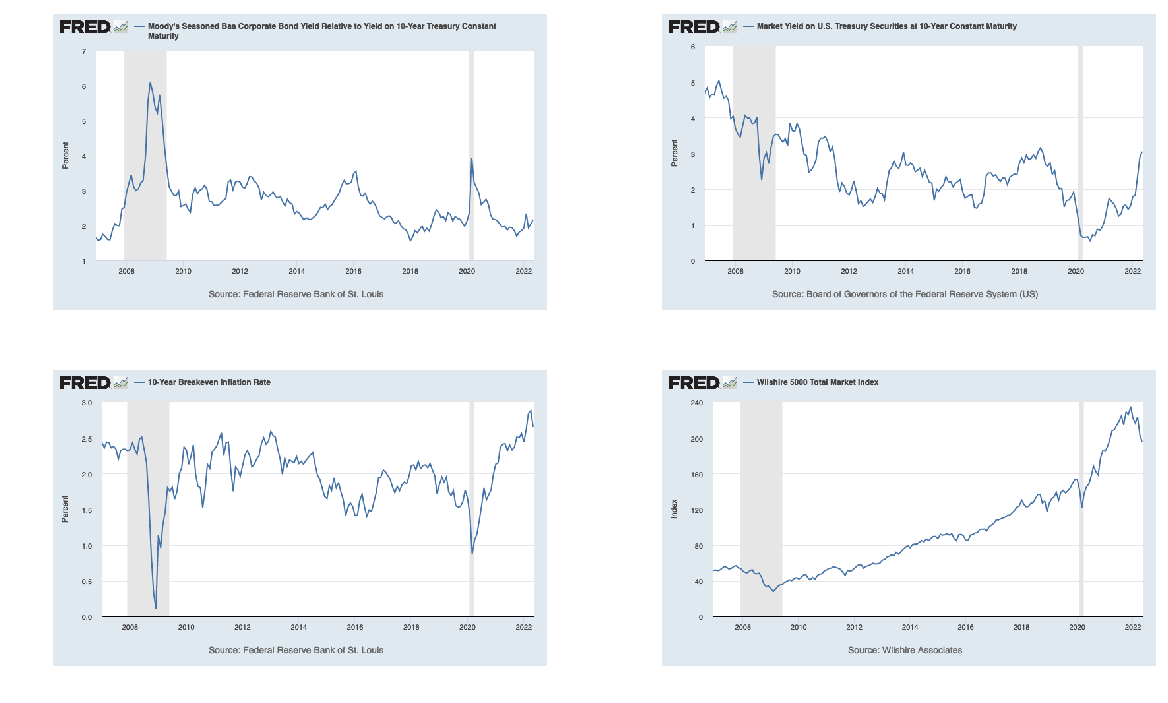

In [105]:
img_list = ["BAA10Y", "DGS10", "T10YIE", "WILL5000IND" ]
fig, axarr = plt.subplots(2,2)
i = 0

for series in img_list:
    r, c = divmod(i, 2)
    filename = "../fred/" + series + ".png"
    a = plt.imread(filename)
    axarr[r, c ].imshow( a )
    axarr[r, c ].set_axis_off()
    i += 1

plt.show()
    

## $\color{blue}{\text{3 - Topic Modeling of FOMC Statements}}$ <a id="section3"></a>

## $\color{blue}{\text{4 - Sentiment Analysis of FOMC Statements}}$ <a id="section4"></a>

## $\color{blue}{\text{5 - Conclusion}}$  <a id="section5"></a>

## $\color{blue}{\text{6 - References}}$  <a id="section6"></a>

<a id="Rossa2013">Carlo Rossa, 2013.</a>  **"The Financial Market Effect of FOMC Minutes"**  Economic Policy Review, Vol. 19, No. 2, 2013  (https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2378398)

<a id='GuKurovWolf2018'>Gu, Chen & Kurov, Alexander & Wolfe, Marketa Halova, 2018.</a> **"Relief Rallies after FOMC Announcements as a Resolution of Uncertainty,"** Journal of Empirical Finance, Elsevier, vol. 49(C), pages 1-18.

<a id='LuccaTrebbi2009'>David O. Lucca & Francesco Trebbi, 2009.</a> **"Measuring Central Bank Communication: An Automated Approach with Application to FOMC Statements,"** NBER Working Papers 15367, National Bureau of Economic Research, Inc. (https://www.nber.org/papers/w15367)

<a id='CieslakMorseVissingJorgensen2019'> A Cieslak, A Morse, A Vissing-Jorgensen, 2019.</a> **"Stock returns over the FOMC cycle"**, Journal of Finance 74(5), 2201-2248 (https://drive.google.com/file/d/1wpT8A2IpMYBP1ytt8n9mk9AdBsnfQ0Ps/view) 

<a id='Cannon2015'>Cannon, S. (2015).</a> **Sentiment of the FOMC: Unscripted.** Economic Review-Federal Reserve Bank of Kansas City, 5. (https://www.kansascityfed.org/documents/545/2015-Sentiment%20of%20the%20FOMC:%20Unscripted.pdf)

<a id='Gutierrez2020'>Gutierrez, L. F., Siami-Namini, S., Tavakoli, N., & Namin, A. S. (2020, December).</a> **A Concern Analysis of Federal Reserve Statements: The Great Recession vs. The COVID-19 Pandemic.** In 2020 IEEE International Conference on Big Data (Big Data) (pp. 2079-2086). IEEE. (https://arxiv.org/pdf/2012.02098.pdf

<a id="Lagana2020">Laganà, D. M. (2020).</a> **Federal reserve’s communication: a latent dirichlet allocation analysis with application to FOMC minutes.**  (http://tesi.luiss.it/27972/1/713391_LAGANA%27_DAISY%20MARTINA.pdf)


<a id="JegadeeshWu2017">Jegadeesh, N., & Wu, D. (2017).</a> **Deciphering Fedspeak: The information content of FOMC meetings.** SSRN (https://www.aeaweb.org/conference/2016/retrieve.php?pdfid=21466&tk=niAkBk3N)


## $\color{blue}{\text{7 - Appendices}}$ <a id="section7"></a>